<a href="https://colab.research.google.com/github/f00-/alternative-methods-of-regression-with-python/blob/master/Chapter_3_Least_Squares_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

## 3.3 Estimation the Regression Line
THe basic idea in estimation the regression lien is to find the straight line that "best" fits the data points in the plot. TO judge how well the estimated regression line $\hat Y = \hat \alpha + \hat \beta X$ fits the data, we can looks at the residual $\hat e_i = y_i - (\hat \alpha + \hat \beta x_i)$

We want to choose $\hat \alpha$ and $\hat \beta$ so that the residuals are small

In the least-squares method of regression, the overall size of the residuals is measured by $\sum{\hat e_i^2}$. The least-squares estimates of $\alpha$ and $\beta$ are defined to be the values $\hat \alpha$ and $\hat \beta$ which give the smalled value of  $\sum{\hat e_i^2}$, that is, which give the least sum of squares of the residuals.

$$
\hat \beta = \frac{\sum{(x_i - \bar x)(y_i - \bar y)}}{\sum{(x_i - \bar x)^2}}\\
\hat \alpha = \bar y - \hat \beta \bar x
\tag{3.2}
$$

Here $\bar x$ and $\bar y$ denote the averages of the $x_i$'s and the $y_i$'s respectively.

## 3.4 Testing $\beta = 0$
We can compare the full model $Y = \alpha + \beta X + e$ using $X$ and the reduced model $Y = \alpha + e$ without X. If the full model fits the data significantly better than the reduced model, this implies that hte relationship between X and Y is significant. Another way of describing the comparison of the two models is to call it a test of hte hypothesis that $\beta = 0$.

Based on the evidence of the data, we must decide whether $\beta = 0$ or $\require{cancel} \beta \cancel{
=} 0$. The hypothesis $\beta = 0$ (the *null hypothesis*) and the hypothesis $\require{cancel} \beta \cancel{
=} 0$ (the *alternative hypothesis*) are not treated equally. Because of our preference for simplicity, even before we look at the evidence we begin with a preference for $\beta = 0$, because the model $Y = \alpha + e$ is simpler than the model $Y = \alpha + \beta X + e$. 

### Description of theTest

$t


## 3.5 Checking Normality

## 3.6 An Example of Multiple Regression

## 3.7 Estimating the Regression Coefficients

Model (3.6) can be reexpressed in matrix notation as
$$
y = X\beta + e
\tag{3.7}
$$

The formula for the vector of least-squares regression estimates is
$$
\hat \beta = (X' X)^{-1} X' y
\tag{3.8}
$$
### Matrix Notation.

### The General Model.

### The Case of Simple Regression

## 3.9 Testing the Regression Coefficients

### A Test Statistic

The suitability of a model can be judged by the size of the residuals. The smaller the residuals, the better the model fits the data. In the least-squares method, an overall measure of the size of the residuals is given by the sum of squares of the residuals. Let SSR denote the sum of squares of the residuals of a model. We can compare the full model wit hthe reduced model by comparing $SSR_full$ with $SSR_reduced$. Specifically, the test statistic we use for testing $\beta_1 = \beta_2 = \beta_3 = \beta_4 = 0$ is

$$
F = \frac{SSR_{reduced} - SSR_{full}}{4 \hat \sigma^2}
\tag{3.10}
$$

### Estimating $\sigma^2$

### The p-Value

### The Distribution of F

## 3.9 Testing $\beta_{q + 1} = ... = \beta_p = 0$

## 3.10 Testing $\beta_3 = 0$

## 3.11 The Coefficient of Determination
The *coefficient of determination* is ameasure of how well the explanatory variables explain the response variable.

$$
R^2 = \frac{\sum(\hat y_i - \bar y)}{\sum(y_i - \bar y)}
$$

In [12]:
### from Chapter 3, Section 3.12 COMPUTATION, page 48
df = pd.DataFrame(data={
    'Y': [37, 40, 48, 44, 50, 51],
    'X_1': [4, 6, 6, 9, 11, 12],
    'X_2': [22, 24, 18, 20, 15, 9]})
df.head()

,X_1,X_2,Y
0,4,22,37
1,6,24,40
2,6,18,48
3,9,20,44
4,11,15,50


In [13]:
X = [4, 6, 6, 9, 11, 12]
Y = [37, 40, 48, 44, 50, 51]

# mean x and y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# total number of values
n = len(X)

numer = 0
denom = 0
for i in range(n):
  numer += (X[i] * mean_x) * (Y[i] - mean_y)
  denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

print(b1, b0)

11.84 -49.72


In [14]:
ss_t = 0
ss_r = 0
for i in range(n):
  y_pred = b0 + b1 * X[i]
  ss_t += (Y[i] - mean_y) ** 2
  ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

-32.856


[1.48]


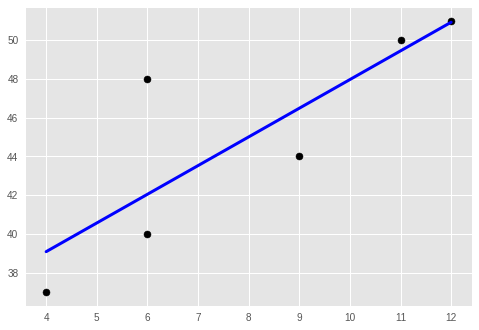

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = [4, 6, 6, 9, 11, 12]
Y = [37, 40, 48, 44, 50, 51]

# cannot use Rank 1 matrix in scikit learn
X = np.array(X).reshape(-1, 1)

reg = LinearRegression()
reg = reg.fit(X, Y)
y_pred = reg.predict(X)

r2_score = reg.score(X, Y)

print(reg.coef_)

plt.scatter(X, Y,  color='black')
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.show()

In [0]:
class LeastSquaresRegression():
  def __init__(self):
    self.coef_ = 0
    self.b1 = 0
    self.b0 = 0

  def fit(X, Y):
    '''
    
    '''
    # mean x and y
    mean_x = np.mean(X)
    mean_y = np.mean(Y)

    # total number of values
    n = len(X)

    numer = 0
    denom = 0
    for i in range(n):
      numer += (X[i] * mean_x) * (Y[i] - mean_y)
      denom += (X[i] - mean_x) ** 2
    this.b1 = numer / denom
    this.b0 = mean_y - (b1 * mean_x)

  def predict(test_set):
    pass

  def score(X, Y):
    '''
      Calculates the coefficient of determination (R-squared / R^2)
      the proportion of the variance in the dependent variable that is predictable from the independent variable
    '''
    # mean x and y
    mean_x = np.mean(X)
    mean_y = np.mean(Y)

    ss_t = 0
    ss_r = 0
    for i in range(n):
      y_pred = b0 + b1 * X[i]
      ss_t += (Y[i] - mean_y) ** 2
      ss_r += (Y[i] - y_pred) ** 2
    r2 = 1 - (ss_r/ss_t)
    return r2